In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from timeit import default_timer as timer
import scipy as sc

In [57]:
Ws = np.array([-128,32,32,32,-32,-32,-32,32])

In [58]:
H_mag = np.zeros((16,16))

In [59]:
for i in range(8):
    H_mag[2*i+1][2*i]= Ws[i]
    H_mag[2*i][2*i+1]= Ws[i]

In [61]:
H_el = np.zeros((16,16))

In [62]:
r_count = np.array([0,1,2,3,2,3,2,3])

In [63]:
for i in range(8):
    H_el[2*i][2*i]= 6/4*r_count[i]
    H_el[2*i+1][2*i+1]= 6/4*(6-r_count[i])

In [64]:
vals = []
g2 = np.linspace(0.1,36,1000)
for i in g2:
    vals.append(np.linalg.eigvalsh(i*H_el+1/i*H_mag))

vals = np.array(vals)

In [66]:
import plaqTheory as p
p1x1 = np.empty((1000,4))
for i in range(1000):
    p1x1[i] = p.getGroundState(4/(g2[i]))

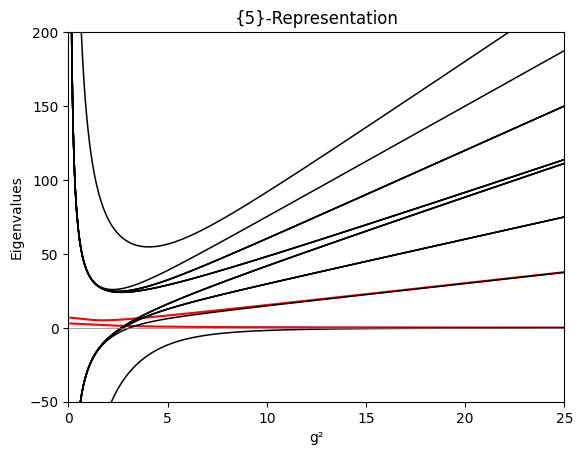

In [66]:
fig, ax = plt.subplots()
#fig.set_size_inches(12, 8)
#fig.set_dpi(300)

plt.plot(g2,p1x1[:,0], color="red")
plt.plot(g2,p1x1[:,0]+p1x1[:,2], color="red")

for i in range(16):
    plt.plot(g2, vals[:,i], color="black", linewidth="1.1")


#plt.hlines([2,-2], xmax=1, xmin=0, colors="black",linewidth=0.5)
plt.hlines(y=0,xmin=0,xmax=25, color="grey",linewidth=0.5)
plt.xlabel("g²")
plt.ylabel("Eigenvalues")
#plt.yscale("symlog")
plt.title("{5}-Representation")

plt.ylim(-50,200)
plt.xlim(0,25)

plt.savefig("plot4.pdf", dpi=300)